In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import sklearn as sk

Importamos todas las librerías que necesitamos

In [54]:
dataframe = pd.read_csv('data/test.csv')

dataframe.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


Si usamos pd.read_csv('ruta del csv') vamos a importar el dataset. Lo que hacemos acá es guardarlo en una variable

El método .head() nos brindará los primeros 5 elementos del dataframe. ¿Qué piensan que va a pasar si ponemos dataframe.tail()?


# Veamos un poco de información

In [55]:
print(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB
None


Con ésto vemos una síntesis de lo que tiene nuestro dataframe. Podemos ver por ejemplo
- La cantidad de columnas y filas. 4277 filas y 13 columnas.
- Que nombre tienen y que tipo de datos almacenan
- También tenemos la columna Non-null Count ¿Qué interpretan de los valores de esa columna?

## Limpieza de datos

Prácticamente nunca vamos a tener un dataset perfecto,\sin valores nulos ni outliers que nos dificulten hacer un correcto análisis.
La limpieza es parte fundamental del análisis.\
Por suerte **Pandas nos brinda métodos para deshacernos de los valores nulos**

In [56]:
nuevo_df = dataframe.dropna()
print(nuevo_df.info())
## Por default dropna() genera un nuevo dataframe sin modificar el original
## Si queremos modificar el original usamos inplace=True
## dataframe.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 3281 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   3281 non-null   object 
 1   HomePlanet    3281 non-null   object 
 2   CryoSleep     3281 non-null   object 
 3   Cabin         3281 non-null   object 
 4   Destination   3281 non-null   object 
 5   Age           3281 non-null   float64
 6   VIP           3281 non-null   object 
 7   RoomService   3281 non-null   float64
 8   FoodCourt     3281 non-null   float64
 9   ShoppingMall  3281 non-null   float64
 10  Spa           3281 non-null   float64
 11  VRDeck        3281 non-null   float64
 12  Name          3281 non-null   object 
dtypes: float64(6), object(7)
memory usage: 358.9+ KB
None


Excelente, ya no hay celdas con valores null pero... **borramos demasiada información!**\
La columna "HomePlanet" tenía 4190 valores no nulos, pero después de la limpieza le dejamos 3281.\
Tenemos que encontrar una forma mejor de limpiar los datos

In [57]:
df1 = dataframe.fillna(-1) ## Con fillna() reemplazamos los valores null por el valor que queramos, evitando así borrar filas enteras por tener algún valor null
print(df1.info())

## Si sólo queremos reemplazar los valores null de una columna específica usamos:
## df = dataframe['Columna'].fillna('Unknown')
## print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   object 
 2   CryoSleep     4277 non-null   object 
 3   Cabin         4277 non-null   object 
 4   Destination   4277 non-null   object 
 5   Age           4277 non-null   float64
 6   VIP           4277 non-null   object 
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4277 non-null   float64
 9   ShoppingMall  4277 non-null   float64
 10  Spa           4277 non-null   float64
 11  VRDeck        4277 non-null   float64
 12  Name          4277 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB
None


In [58]:
df1

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,-1,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,-1.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,-1,-1.0,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


Buenísimo pero todavía podemos mejorar mucho más.\
Es importante que hagamos fillna() o dropna() únicamente en las columnas que querramos. Y con valores que nos convengan.\
Hacer fillna(-1) sobre la columna 'Age' podría traernos problemas si quisieramos por ejemplo calcular el promedio de edad.\
Es más, hay columnas (como 'Name' o 'VRDeck') que directamente no nos van a brindar información relevante. \
Recordemos que queremos hacer un estudio de **supervivientes en base a la edad, cabina, planeta de origen y llegada y si son VIP o no**

### Hagamos una limpieza un poco más sensata

In [59]:
df = dataframe.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Name'], axis=1)
df = df.dropna(subset=['Age'])  ## Con el parámetro subset le indicamos a dropna() que sólo elimine las filas que tengan valores null en la columna 'Age'
df


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False
...,...,...,...,...,...,...,...
4270,9265_01,Mars,False,D/278/S,TRAPPIST-1e,43.0,False
4271,9266_01,Earth,False,F/1796/S,TRAPPIST-1e,40.0,False
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False


No perdimos **tanta info** ahora no?\
Bueno podemos igual checkear, columna por columna si hay valores NaN

In [60]:
# Para ver si HAY algún NaN en todo el DataFrame (resultado booleano único)
has_any_nan = df.isnull().any().any()
print(f"¿Hay algún NaN en el DataFrame? {has_any_nan}")

# Para contar cuántos NaN hay por columna
nan_count = df.isnull().sum()
print("Cantidad de NaN por columna:")
print(nan_count)

# Columnas que tienen NaN
columns_with_nan = df.isnull().any()
columns_with_nan = columns_with_nan[columns_with_nan == True]
print("Columnas con valores NaN:")
print(columns_with_nan)


¿Hay algún NaN en el DataFrame? True
Cantidad de NaN por columna:
PassengerId     0
HomePlanet     84
CryoSleep      91
Cabin          99
Destination    87
Age             0
VIP            90
dtype: int64
Columnas con valores NaN:
HomePlanet     True
CryoSleep      True
Cabin          True
Destination    True
VIP            True
dtype: bool


In [61]:
# Para ahorrar tiempo, vamos a eliminar todos los valores NaN que quedaron en el dataframe
# Recemos que no perdamos demasiada información
df = df.dropna(subset=['Cabin','HomePlanet','CryoSleep','Destination','VIP'])
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False
...,...,...,...,...,...,...,...
4269,9263_01,Earth,True,G/1495/S,TRAPPIST-1e,43.0,False
4270,9265_01,Mars,False,D/278/S,TRAPPIST-1e,43.0,False
4271,9266_01,Earth,False,F/1796/S,TRAPPIST-1e,40.0,False
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False


De ésta manera, tenemos un dataframe que ya no tiene valores NaN que nos afecten\
pero sacrificamos unas 500 filas, no debemos olvidarnos de eso.\
Por último, checkeemos que no haya valores duplicados

In [62]:
print(df.duplicated().sum())

0


### Visualicemos unos datos

Text(0.5, 1.0, 'Distribución de edades')

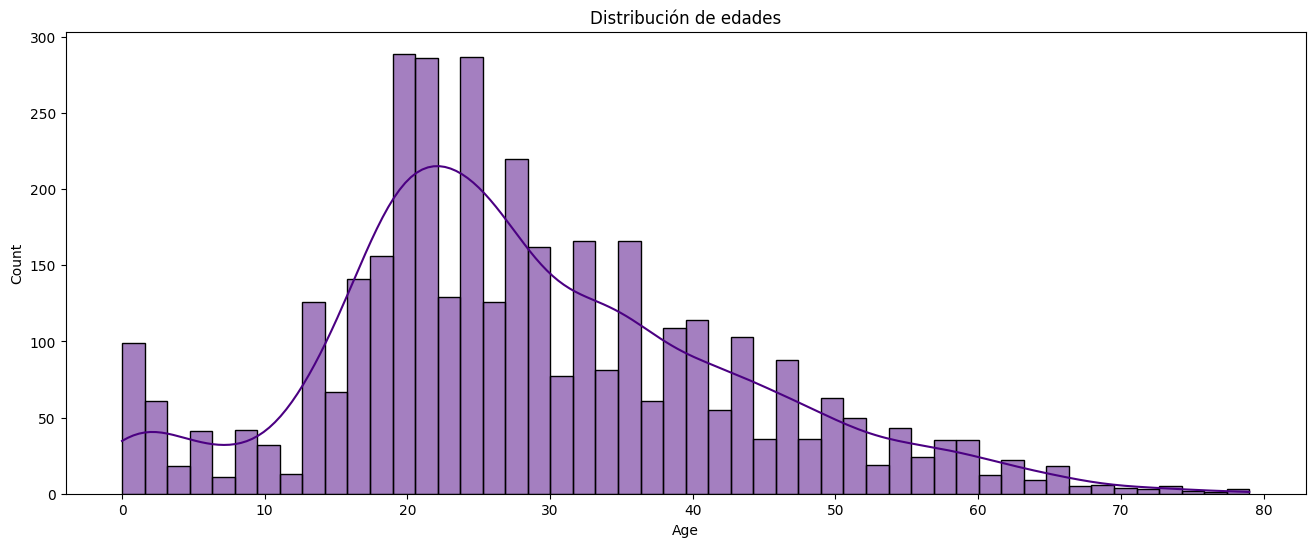

In [81]:
plt.figure(figsize=(16,6))
sns.histplot(df['Age'], bins=50, kde=True, color='indigo')
plt.title("Distribución de edades")